# Data Mining Versuch Document Classification
* Autor: Prof. Dr. Johannes Maucher
* Datum: 06.11.2015

[Übersicht Ipython Notebooks im Data Mining Praktikum](Data Mining Praktikum.ipynb)

# Einführung
## Lernziele:
In diesem Versuch sollen Kenntnisse in folgenden Themen vermittelt werden:

* Dokumentklassifikation: Klassifikation von Dokumenten, insbesondere Emails und RSS Feed
* Naive Bayes Classifier: Weit verbreitete Klassifikationsmethode, welche unter bestimmten Randbedingungen sehr gut skaliert.


## Theorie zur Vorbereitung
### Parametrische Klassifikation und Naive Bayes Methode
Klassifikatoren müssen zu einer gegebenen Eingabe $\underline{x}$ die zugehörige Klasse $C_i$ bestimmen. Mithilfe der Wahrscheinlichkeitstheorie kann diese Aufgabe wie folgt beschrieben werden: Bestimme für alle möglichen Klassen $C_i$ die bedingte Wahrscheinlichkeit $P(C_i | \underline{x})$, also die Wahrscheinlichkeit, dass die gegebene Eingabe $\underline{x}$ in Klasse $C_i$ fällt. Wähle dann die Klasse aus, für welche diese Wahrscheinlichkeit maximal ist.

Die Entscheidungsregeln von Klassifikatoren können mit Methoden des ""überwachten Lernens"" aus Trainingsdaten ermittelt werden. Im Fall des **parametrischen Lernens** kann aus den Trainingsdaten die sogenannte **Likelihood-Funktion** $p(\underline{x} \mid C_i)$ bestimmt werden. _Anmerkung:_ Allgemein werden mit $p(...)$ kontinuierliche Wahrscheinlichkeitsfunktionen und mit $P(...)$ diskrete Wahrscheinlichkeitswerte bezeichnet. 

Mithilfe der **Bayes-Formel**
$$
P(C_i \mid \underline{x}) = \frac{p(\underline{x} \mid C_i) \cdot P(C_i)}{p(\underline{x})}
$$

kann aus der Likelihood die **a-posteriori-Wahrscheinlichkeit $P(C_i \mid \underline{x})$** berechnet werden. Darin wird $P(C_i)$ die **a-priori-Wahrscheinlichkeit** und $p(\underline{x})$ die **Evidenz** genannt. Die a-priori-Wahrscheinlichkeit kann ebenfalls aus den Trainingsdaten ermittelt werden. Die Evidenz ist für die Klassifikationsentscheidung nicht relevant, da sie für alle Klassen $C_i$ gleich groß ist.

Die Berechnung der Likelihood-Funktion $p(\underline{x} \mid C_i)$ ist dann sehr aufwendig, wenn $\underline{x}=(x_1,x_2,\ldots,x_Z)$ ein Vektor von voneinander abhängigen Variablen $x_i$ ist. Bei der **Naive Bayes Classification** wird jedoch von der vereinfachenden Annahme ausgegangen, dass die Eingabevariabeln $x_i$ voneinander unabhängig sind. Dann vereinfacht sich die bedingte Verbundwahrscheinlichkeits-Funktion $p(x_1,x_2,\ldots,x_Z \mid C_i)$ zu:

$$
p(x_1,x_2,\ldots,x_Z \mid C_i)=\prod\limits_{j=1}^Z p(x_j | C_i)
$$

### Anwendung der Naive Bayes Methode in der Dokumentklassifikation
Auf der rechten Seite der vorigen Gleichung stehen nur noch von den jeweils anderen Variablen unabhängige bedingte Wahrscheinlichkeiten. Im Fall der Dokumentklassifikation sind die einzelnen Worte die Variablen, d.h. ein Ausdruck der Form $P(x_j | C_i)$ gibt an mit welcher Wahrscheinlichkeit ein Wort $x_j=w$ in einem Dokument der Klasse $C_i$ vorkommt. 
Die Menge aller Variablen $\left\{x_1,x_2,\ldots,x_Z \right\}$ ist dann die Menge aller Wörter im Dokument. Damit gibt die linke Seite in der oben gegebenen Gleichung die _Wahrscheinlichkeit, dass die Wörter $\left\{x_1,x_2,\ldots,x_Z \right\}$ in einem Dokument der Klasse $C_i$ vorkommen_ an.

Für jedes Wort _w_ wird aus den Trainingsdaten die Wahrscheinlichkeit $P(w|G)$, mit der das Wort in Dokumenten der Kategorie _Good_ und die Wahrscheinlichkeit $P(w|B)$ mit der das Wort in Dokumenten der Kategorie _Bad_ auftaucht ermittelt. Trainingsdokumente werden in der Form

$$
tD=(String,Category)
$$
eingegeben. 

Wenn 

* mit der Variable $fc(w,cat)$ die Anzahl der Trainingsdokumente in Kategorie $cat$ in denen das Wort $w$ enthalten ist
* mit der Variable $cc(cat)$ die Anzahl der Trainingsdokumente in Kategorie $cat$ 

gezählt wird, dann ist 

$$
P(w|G)=\frac{fc(w,G)}{cc(G)} \quad \quad P(w|B)=\frac{fc(w,B)}{cc(B)}.
$$

Wird nun nach der Eingabe von $L$ Trainingsdokumenten ein neu zu klassifizierendes Dokument $D$ eingegeben und sei $W(D)$ die Menge aller Wörter in $D$, dann berechnen sich unter der Annahme, dass die Worte in $W(D)$ voneinander unabhängig sind (naive Bayes Annahme) die a-posteriori Wahrscheinlichkeiten zu:

$$
P(G|D)=\frac{\left( \prod\limits_{w \in W(D)} P(w | G) \right) \cdot P(G)}{p(D)}
$$
und
$$
P(B|D)=\frac{\left( \prod\limits_{w \in W(D)} P(w | B) \right) \cdot P(B)}{p(D)}.
$$

Die hierfür notwendigen a-priori-Wahrscheinlichkeiten berechnen sich zu 

$$
P(G)=\frac{cc(G)}{L}
$$
und
$$
P(B)=\frac{cc(B)}{L}
$$

Die Evidenz $p(D)$ beeinflusst die Entscheidung nicht und kann deshalb ignoriert werden.


## Vor dem Versuch zu klärende Fragen


1. Wie wird ein Naive Bayes Classifier trainiert? Was muss beim Training für die spätere Klassifikation abgespeichert werden?
2. Wie teilt ein Naiver Bayes Classifier ein neues Dokument ein?
3. Welche naive Annahme liegt dem Bayes Classifier zugrunde? Ist diese Annahme im Fall der Dokumentklassifikation tatsächlich gegeben?
4. Betrachten Sie die Formeln für die Berechnung von $P(G|D)$ und $P(B|D)$. Welches Problem stellt sich ein, wenn in der Menge $W(D)$ ein Wort vorkommt, das nicht in den Trainingsdaten der Kategorie $G$ vorkommt und ein anderes Wort aus $W(D)$ nicht in den Trainingsdaten der Kategorie $B$ enthalten ist? Wie könnte dieses Problem gelöst werden? 



#### 1 Wie wird Bayes trainiert?
Der Bayes Classifier wird mit Hilfe von Trainingstexten trainiert. Ein Trainingstext ist ein Text dessen Klasse bereits bekannt ist. Von jedem Text wird dann die Häufigkeit der einzelnen Wörter gezählt und nach Klassen abgespeichert.

#### 2 Wie wird ein Dokument eingeteilt?
1. Das Dokument wird in eine Liste umgewandelt. Die enthaltenen Wörter werden in eine Liste gespeichert.
1. Danach wird für jedes einzelne Wort die Wahrscheinlichkeit der Wörter in der einzelnen Klasse berechnet.
1. Anschließend werden all diese Wahrscheinlichkeiten, pro Klasse, miteinander multipliziert.
1. Nun wird geschaut welche der einzelnen Kategorien, die höchste Trefferquote hat. (Wahrscheinlichkeit)
1. Anschließend bekommt der ankommende Text die Klassifikation mit der höchsten Wahrscheinlichkeit.

#### 3 Annahme beim naiven Bayes?
Beim naiven Bayes wird davon ausgegangen das alle Wörter in einem Text unabhängig voneinander sind. 
##### 3.1 Naive
Das heißt es wird nur die Wahrscheinlichkeit des Vorkommens *eines* Wortes unter der Bedingung einer bestimmten Klassifikation berechnet. 
###### 3.2 Bayes (Nicht naiv)
Beim nicht naiven Bayes würde die Wahrscheinlichkeit des Vorkommens *aller* Wörter im zu untersuchenden Text unter Annahme einer Klassifikation berechnet. Da alle Wörter in der Zielmenge (Klasse) vorkommen die auch im zu klassifizierenden Text vorkommen, ist jedoch sehr unwahrscheinlich und daher für Texte nicht brauchbar. Zusätzlich würde die Berechnungszeit bei diesem Ansatz erheblich.
##### 3.3 abhängig oder unabhänging?
Die Annahme das die Wörter in einem Text unabhängig voneinander sind ist, schlichtweg falsch. Da jedoch der klassische Bayes nicht auf dieses Problem anwendbar ist und der naive Bayes zusätzlich ein sehr gutes, schnelles Ergebnis liefert, wird er trotzdem angewendet. Mathematisch ist diese Annahme jedoch nicht vertretbar.

#### 4 Das Problem wenn das Wort nicht in den Trainingsdaten Vorhanden ist
Die Wahrscheinlichkeit ob ein Wort zu einer Klasse gehört wird folgendermaßen berechnet:
$$
P(Klassifikation|Wort) = \frac{Worthäufigkeit In Klassifikation} {Worthäufigkeit Über Alle Klassifikationen}
$$

Dies wird nun für alle Wörter im zu klassifizierenden Text gemacht. Die Ergebnisse der einzelne Zahlen werden dann wieder miteinander multipliziert.
*Beispiel:* Eingabetext: {"Hallo", "Du"} Klasse: Egoistisch [(Hallo, 5), (Du,0)]
$$
P(Du|Egoistisch) = \frac{0}{20} = 0
$$

$$
P(Hallo|Egoistisch) = \frac{10}{50} = \frac{1}{5}
$$

$$
P(Hallo Du|Egoistisch) = \frac{1}{5} * 0 = 0
$$

Ist also ein Wort im Eingabetext vorhanden,jedoch nicht in der Klasse ist deren Wahrscheinlichkeit 0. Diese wird anschließend mit den anderen Wahrscheinlichkeiten multipliziert. Was dazu führt dass, die Wahrscheinlichkeit '0' wird, egal wie gut der Rest des Eingabetextes auf die Klassifikation passt.

*Lösung:*
Eine Möglichkeit ist es einfach alle 0-Wahrscheinlichkeiten durch die sogenannte Pass-Wahrscheinlichkeit zu ersetzten:


P<sub>ass,i</sub> = $ \frac{1}{K} $ , mit [K]: Anzahl der Klassen.

Somit wird eine Wahrscheinlichkeit eingesetzt, die in etwa der mittleren Wahrscheinlichkeit entspricht. Das hat zu Folge dass, das Ergebnis nur minimal verfälscht wird.

# Durchführung
## Feature Extraction/ -Selection

**Aufgabe:**
Implementieren Sie eine Funktion _getwords(doc)_, der ein beliebiges Dokument in Form einer String-Variablen übergeben wird. In der Funktion soll der String in seine Wörter zerlegt und jedes Wort in _lowercase_ transformiert werden. Wörter, die weniger als eine untere Grenze von Zeichen (z.B. 3) oder mehr als eine obere Grenze von Zeichen (z.B. 20) enthalten, sollen ignoriert werden. Die Funktion soll ein dictionary zurückgeben, dessen _Keys_ die Wörter sind. Die _Values_ sollen für jedes Wort zunächst auf $1$ gesetzt werden.

**Tipp:** Benutzen Sie für die Zerlegung des Strings und für die Darstellung aller Wörter mit ausschließlich kleinen Buchstaben die Funktionen _split(), strip('sep')_ und _lower()_ der Klasse _String_.  


In [1]:
import pandas as pd 
import numpy as np
import matplotlib
from collections import defaultdict
from operator import mul

In [2]:
def getwords(doc):
    "create lowercase word dict with keys between len(range(4,20))"
    word_dict = {}    
    word_dict = {x.lower() : 1 for x in doc.split() if len(x) in range(4,20)}
    return word_dict

getwords("Hallo Hallo das ist ein Test")

{'hallo': 1, 'test': 1}

## Classifier

**Aufgabe:**
Implementieren Sie den Naive Bayes Classifier für die Dokumentklassifikation. Es bietet sich an die Funktionalität des Klassifikators und das vom Klassifikator gelernte Wissen in einer Instanz einer Klasse _Classifier_ zu kapseln. In diesem Fall kann wie folgt vorgegangen werden:

* Im Konstruktor der Klasse wird je ein Dictionary für die Instanzvariablen _fc_ und _cc_ (siehe oben) initialisiert. Dabei ist _fc_ ein verschachteltes Dictionary. Seine Keys sind die bisher gelernten Worte, die Values sind wiederum Dictionaries, deren Keys die Kategorien _Good_ und _Bad_ sind und deren Values zählen wie häufig das Wort bisher in Dokumenten der jeweiligen Kategorie auftrat. Das Dictionary _cc_ hat als Keys die Kategorien _Good_ und _Bad_. Die Values zählen wie häufig Dokumente der jeweiligen Kategorien bisher auftraten.
* Im Konstruktor wird ferner der Instanzvariablen _getfeatures_ die Funktion _getwords()_ übergeben. Die Funktion _getwords()_ wurde bereits zuvor ausserhalb der Klasse definiert. Sinn dieses Vorgehens ist, dass andere Varianten um Merkmale aus Dokumenten zu extrahieren denkbar sind. Diese Varianten könnten dann ähnlich wie die _getwords()_-Funktion ausserhalb der Klasse definiert und beim Anlegen eines _Classifier_-Objekts der Instanzvariablen _getfeatures_ übergeben werden.  
* Der Methode _incf(self,f,cat)_ wird ein Wort _f_ und die zugehörige Kategorie _cat_ des Dokuments in welchem es auftrat übergeben. In der Methode wird der _fc_-Zähler angepasst.
* Der Methode _incc(self,cat)_ wird die Kategorie _cat_ des gerade eingelesenen Dokuments übergeben. In der Methode wird der _cc_-Zähler angepasst.
* Die Methode _fcount(self,f,cat)_ gibt die Häufigkeit des Worts _f_ in den Dokumenten der Kategorie _cat_ zurück.
* Die Methode _catcount(self,cat)_ gibt die Anzahl der Dokumente in der Kategorie _cat_ zurück.
* Die Methode _totalcount(self)_ gibt die Anzahl aller Dokumente zurück.
* Der Methode _train(self,item,cat)_ wird ein neues Trainingselement, bestehend aus der Betreffzeile (_item_) und der entsprechenden Kategorisierung (_cat_) übergeben. Der String _item_ wird mit der Instanzmethode _getfeatures_ (Diese referenziert _getwords()_) in Worte zerlegt. Für jedes einzelne Wort wird dann _incf(self,f,cat)_ aufgerufen. Ausserdem wird für das neue Trainingsdokument die Methode _incc(self,cat)_ aufgerufen.
* Die Methode _fprob(self,f,cat)_ berechnet die bedingte Wahrscheinlichkeit $P(f | cat)$ des Wortes _f_ in der Kategorie _cat_ entsprechend der oben angegebenen Formeln, indem sie den aktuellen Stand des Zählers _fc(f,cat)_ durch den aktuellen Stand des Zählers _cc(cat)_ teilt.   
* Die Methode _fprob(self,f,cat)_ liefert evtl. ungewollt extreme Ergebnisse, wenn noch wenig Wörter im Klassifizierer verbucht sind. Kommt z.B. ein Wort erst einmal in den Trainingsdaten vor, so wird seine Auftrittswahrscheinlichkeit in der Kategorie in welcher es nicht vorkommt gleich 0 sein. Um extreme Wahrscheinlichkeitswerte im Fall noch selten vorkommender Werte zu vermeiden, soll zusätzlich zur Methode _fprob(self,f,cat)_ die Methode _weightedprob(self,f,cat)_ implementiert und angewandt werden. Der von ihr zurückgegebene Wahrscheinlichkeitswert könnte z.B. wie folgt berechnet werden:$$wprob=\frac{initprob+count \cdot fprob(self,f,cat)}{1+count},$$ wobei $initprob$ ein initialer Wahrscheinlichkeitswert (z.B. 0.5) ist, welcher zurückgegeben werden soll, wenn das Wort noch nicht in den Trainingsdaten aufgetaucht ist. Die Variable $count$ zählt wie oft das Wort $f$ bisher in den Trainingsdaten auftrat. Wie zu erkennen ist, nimmt der Einfluss der initialen Wahrscheinlichkeit ab, je häufiger das Wort in den Trainingsdaten auftrat.
* Nach dem Training soll ein beliebiges neues Dokument (Text-String) eingegeben werden können. Für dieses soll mit der Methode _prob(self,item,cat)_ die a-posteriori-Wahrscheinlichkeit $P(cat|item)$ (Aufgrund der Vernachlässigung der Evidenz handelt es sich hierbei genaugenommen um das Produkt aus a-posteriori-Wahrscheinlichkeit und Evidenz), mit der das Dokument _item_ in die Kategorie _cat_ fällt berechnet werden. Innerhalb der Methode _prob(self,item,cat)_ soll zunächst die Methode _weightedprob(self,f,cat)_ für alle Wörter $f$ im Dokument _item_ aufgerufen werden. Die jeweiligen Rückgabewerte von _weightedprob(self,f,cat)_ werden multipliziert. Das Produkt der Rückgabewerte von _weightedprob(self,f,cat)_ über alle Wörter $f$ im Dokument muss schließlich noch mit der a-priori Wahrscheinlichkeit $P(G)$ bzw. $P(B)$ entsprechend der oben aufgeführten Formeln multipliziert werden. Das Resultat des Produkts wird an das aufrufende Programm zurück gegeben, die Evidenz wird also vernachlässigt (wie oben begründet).



Ein Dokument _item_ wird schließlich der Kategorie _cat_ zugeteilt, für welche die Funktion _prob(self,item,cat)_ den höheren Wert zurück gibt. Da die Rückgabewerte in der Regel sehr klein sind, werden in der Regel folgende Werte angezeigt. Wenn mit $g$ der Rückgabewert von _prob(self,item,cat=G)_ und mit $b$ der Rückgabewert von _prob(self,item,cat=B)_ bezeichnet wird dann ist die Wahrscheinlichkeit, dass $item$ in die Kategorie $G$ fällt, gleich:
$$
\frac{g}{g+b}
$$
und die Wahrscheinlichkeit, dass $item$ in die Kategorie $B$ fällt, gleich:
$$
\frac{b}{g+b}
$$

In [3]:
class Classy:
    
    def __init__(self, getfeatures):
        self.fc = defaultdict(lambda : defaultdict(int))
        self.cc = defaultdict(int)
        self.getfeatures = getfeatures
    
    def classify(self, item):
        '''classifies item – returns the category to which the item most likely belongs'''
        probs = self.allprobs(item)
        return max(probs, key=probs.get)
    
    def allprobs(self, item):
        '''calculates propabilities for all possible categories'''
        return {cat: self.prob(item, cat) for cat in self.cc}
    
    def prob(self, item, cat):
        '''a-posteriori-Wahrscheinlichkeit P(cat|item)'''
        wprobsprod = reduce(mul, [self.weightedprob(f,cat) for f in self.getfeatures(item)])
        return wprobsprod * self.cc[cat]/self.totalcount()
    
    def incc(self, cat):
        'zählt cc (categoryCount) hoch'
        self.cc[cat] += 1
    
    def incf(self, f, cat):
        'zählt fc (featureCount) hoch'
        self.fc[f][cat] += 1
        
    def fcount(self,f, cat=None):
        if cat is None:
            'gibt Häufigkeit des Word f zurück'
            return sum(self.fc[f].values())  
        else:
            'gibt Häufigkeit des Word f einer bestimmten Cat zurück'
            return self.fc[f][cat]
               
    def catcount(self,cat):
        'gibt Häufigkeit einer category aus'
        return self.cc[cat]
    
    def totalcount(self):
        'gibt Anzahl aller documents aus'
        return sum(self.cc.values())
    
    def train(self, item, cat):
        'für item wird incc aufgerufen'
        self.incc(cat)
        
        'features extrahieren'
        features = self.getfeatures(item)
        
        'für jedes feature wird incf() aufgerufen'
        for f in features:
            self.incf(f,cat)
   
    def fprob(self,f,cat):
        '''Die Methode fprob(self,f,cat) berechnet die bedingte Wahrscheinlichkeit  P(f|cat)
        des Wortes f in der Kategorie cat entsprechend der oben angegebenen Formeln, indem sie 
        den aktuellen Stand des Zählers fc(f,cat) durch den aktuellen Stand des Zählers cc(cat) teilt.'''
        return self.fcount(f,cat)/float(self.catcount(cat))
        
    def weightedprob(self,f,cat):
        '''weighted = (0.5 + (count * fprob(self, f cat))) / (1 + count)'''
        initprob = 0.5
        count = self.fcount(f)
        fprob = self.fprob(f,cat)
        return (initprob + count * fprob)/(1 + count)

##### testdaten #####   
doc_list = pd.DataFrame([('Good', 'nobody owns the water'), ('Good', 'the quick rabbit jumps fences'),
                         ('Good', 'make quick money at the online casino'), 
                         ('Good', 'next meeting is at night'), ('Bad', 'buy pharmaceuticals now'), 
                         ('Bad', 'the quick brown fox jumps'), 
                         ('Bad', 'meeting with your superstar'), ('Bad', 'money like water')])  
labels = doc_list[0]


In [4]:
def to_dict(d):
    '''helper class – converts defaultdict to regular dict'''
    if isinstance(d, defaultdict):
        d = {k: to_dict(v) for k, v in d.iteritems()}
    return d

c = Classy(getwords)

for index, row in doc_list.iterrows():
    #print type(row), row[0], row[1]
    cat = row[0]
    item = row[1]
    c.train(item, cat)

print '\ncc:\n',to_dict(c.cc)
print '\nfc:\n',to_dict(c.fc)

print '\nfccount brown Bad:',c.fcount('brown', 'Bad')
print '\ntotalcount:',c.totalcount()

f = 'quick'
good = 'Good'
bad = 'Bad'

print '\nfprob(', good, '|', f, ') = ', c.fprob(f,good)
print '\nfprob(', bad, '|', f, ') = ', c.fprob(f,bad)

print '-'*80

print c.weightedprob(f,bad)
print c.weightedprob(f,good)

doc = doc_list.iloc[4][1]
print doc
print c.prob(doc ,good)
print c.classify(doc)
print c.allprobs(doc)


cc:
{'Bad': 4, 'Good': 4}

fc:
{'brown': {'Bad': 1}, 'nobody': {'Good': 1}, 'money': {'Bad': 1, 'Good': 1}, 'like': {'Bad': 1}, 'meeting': {'Bad': 1, 'Good': 1}, 'jumps': {'Bad': 1, 'Good': 1}, 'casino': {'Good': 1}, 'make': {'Good': 1}, 'next': {'Good': 1}, 'water': {'Bad': 1, 'Good': 1}, 'pharmaceuticals': {'Bad': 1}, 'online': {'Good': 1}, 'rabbit': {'Good': 1}, 'night': {'Good': 1}, 'quick': {'Bad': 1, 'Good': 2}, 'superstar': {'Bad': 1}, 'fences': {'Good': 1}, 'with': {'Bad': 1}, 'your': {'Bad': 1}, 'owns': {'Good': 1}}

fccount brown Bad: 1

totalcount: 8

fprob( Good | quick ) =  0.5

fprob( Bad | quick ) =  0.25
--------------------------------------------------------------------------------
0.3125
0.5
buy pharmaceuticals now
0.125
Bad
{'Bad': 0.1875, 'Good': 0.125}


In [5]:
# möglicherweise können wir das training optional im constructor abarbeiten, wenn daten und mitgegeben werden
#c = Classy(labels, doc_list, getwords)

## Test

**Aufgabe:**
Instanzieren Sie ein Objekt der Klasse _Classifier_ und übergeben Sie der _train()_ Methode dieser Klasse mindestens 8 kategorisierte Dokumente (Betreffzeilen als Stringvariablen zusammen mit der Kategorie Good oder Bad). Definieren Sie dann ein beliebig neues Dokument und berechnen Sie für dieses die Kategorie, in welches es mit größter Wahrscheinlichkeit fällt. Benutzen Sie für den Test das in 
[NLP Vorlesung Document Classification](https://www.mi.hdm-stuttgart.de/mib/studium/intern/skripteserver/skripte/NaturalLanguageProcessing/WS1415/03TextClassification.pdf)
ausführlich beschriebene Beispiel zu implementieren. Berechnen Sie die Klassifikatorausgabe des Satzes _the money jumps_.

In [6]:
#Your Code

## Klassifikation von RSS Newsfeeds
Mit dem unten gegebenen Skript werden Nachrichten verschiedener Newsserver geladen und als String abgespeichert.

* Das Skript haben wir erweitert sodass es uns einen Dataframe für Test und Training erstellt.

In [7]:
import feedparser

rssfeeds = pd.DataFrame(columns=['label','text','source'])
testRssfeeds = pd.DataFrame(columns=['label','text','source'])

def stripHTML(h):
  p=''
  s=0
  for c in h:
    if c=='<': s=1
    elif c=='>':
      s=0
      p+=' '
    elif s==0:
      p+=c
  return p


trainTech=['http://www.chip.de/rss/rss_tests.xml',
           #'http://feeds.feedburner.com/netzwelt',
           'http://rss1.t-online.de/c/11/53/06/84/11530684.xml',
           'http://www.computerbild.de/rssfeed_2261.xml?node=13',
           'http://www.heise.de/newsticker/heise-top-atom.xml']

trainNonTech=['http://newsfeed.zeit.de/index',
              'http://newsfeed.zeit.de/wirtschaft/index',
              'http://www.welt.de/politik/?service=Rss',
              'http://www.spiegel.de/schlagzeilen/tops/index.rss',
              'http://www.sueddeutsche.de/app/service/rss/alles/rss.xml',
              'http://www.faz.net/rss/aktuell/'
              ]
test=["http://rss.golem.de/rss.php?r=sw&feed=RSS0.91",
          'http://newsfeed.zeit.de/politik/index',  
          'http://www.welt.de/?service=Rss'
           ]

countnews={}
countnews['tech']=0
countnews['nontech']=0
countnews['test']=0
print "--------------------News from trainTech------------------------"
for feed in trainTech:
    print "*"*30
    print feed
    f=feedparser.parse(feed)
    for e in f.entries:
      #print '\n---------------------------'
      if 'summary' in e.keys() and 'title' in e.keys():
        fulltext=stripHTML(e.title+' '+e.description)
        rssfeeds = rssfeeds.append(pd.DataFrame({'label': 'tech','text': fulltext, 'source': feed}, index=[0]), ignore_index=True)
        countnews['tech']+=1
print "----------------------------------------------------------------"
print "----------------------------------------------------------------"
print "----------------------------------------------------------------"

print "--------------------News from trainNonTech------------------------"
for feed in trainNonTech:
    print "*"*30
    print feed
    f=feedparser.parse(feed)
    for e in f.entries:
      #print '\n---------------------------'
      if 'summary' in e.keys() and 'title' in e.keys():
        fulltext=stripHTML(e.title+' '+e.description)
        rssfeeds = rssfeeds.append(pd.DataFrame({'label': 'nontech','text': fulltext, 'source': feed}, index=[0]), ignore_index=True)      
        countnews['nontech']+=1
print "----------------------------------------------------------------"
print "----------------------------------------------------------------"
print "----------------------------------------------------------------"


print "--------------------News from test------------------------"
for feed in test:
    print "*"*30
    print feed
    f=feedparser.parse(feed)
    for e in f.entries:
      #print '\n---------------------------'
      if 'summary' in e.keys() and 'title' in e.keys():    
        fulltext=stripHTML(e.title+' '+e.description)
        testRssfeeds = testRssfeeds.append(pd.DataFrame({'text': fulltext, 'source': feed}, index=[0]), ignore_index=True)            
        countnews['test']+=1
print "----------------------------------------------------------------"
print "----------------------------------------------------------------"
print "----------------------------------------------------------------"

print 'Number of used trainings samples in categorie tech',countnews['tech']
print 'Number of used trainings samples in categorie nontech',countnews['nontech']
print 'Number of used test samples',countnews['test']
print '--'*30

--------------------News from trainTech------------------------
******************************
http://www.chip.de/rss/rss_tests.xml
******************************
http://rss1.t-online.de/c/11/53/06/84/11530684.xml
******************************
http://www.computerbild.de/rssfeed_2261.xml?node=13
******************************
http://www.heise.de/newsticker/heise-top-atom.xml
----------------------------------------------------------------
----------------------------------------------------------------
----------------------------------------------------------------
--------------------News from trainNonTech------------------------
******************************
http://newsfeed.zeit.de/index
******************************
http://newsfeed.zeit.de/wirtschaft/index
******************************
http://www.welt.de/politik/?service=Rss
******************************
http://www.spiegel.de/schlagzeilen/tops/index.rss
******************************
http://www.sueddeutsche.de/app/service/rss/a

#### Ausgabe der Dokumente

In [8]:
print 'rssfeeds:\n', rssfeeds.sample(10)
print '\n testRssfeeds:\n', testRssfeeds.sample(10)

rssfeeds:
       label                                             source  \
173  nontech            http://www.welt.de/politik/?service=Rss   
82      tech  http://www.heise.de/newsticker/heise-top-atom.xml   
30      tech  http://rss1.t-online.de/c/11/53/06/84/11530684...   
205  nontech  http://www.sueddeutsche.de/app/service/rss/all...   
44      tech  http://www.computerbild.de/rssfeed_2261.xml?no...   
152  nontech            http://www.welt.de/politik/?service=Rss   
14      tech  http://rss1.t-online.de/c/11/53/06/84/11530684...   
87      tech  http://www.heise.de/newsticker/heise-top-atom.xml   
183  nontech  http://www.spiegel.de/schlagzeilen/tops/index.rss   
212  nontech  http://www.sueddeutsche.de/app/service/rss/all...   

                                                  text  
173  Leere Flüchtlingsunterkünfte kosten die Kommun...  
82   Europäisches Leistungsschutzrecht: EU-Kommissi...  
30   „FIFA 18“ über eine Million Mal verkauft Der B...  
205  Vom schmalen Grat d

**Aufgaben:**  
1.  
Trainieren Sie Ihren Naive Bayes Classifier mit allen Nachrichten der in den Listen _trainTech_ und _trainNonTech_ definierten Servern. Weisen Sie für das Training allen Nachrichten aus _trainTech_ die Kategorie _Tech_ und allen Nachrichten aus _trainNonTech_ die Kategorie _NonTech_ zu.


* Training

In [13]:
rssC = Classy(getwords)

for index, row in rssfeeds.iterrows():
    #print type(row), row[0], row[1]
    cat = row[0]
    item = row[2]
    rssC.train(item, cat)

  * Test der Klassifikation

In [93]:
tech = 'tech'
nontech = 'nontech'

print 'Digitalisierung',  tech, ':', rssC.prob('Digitalisierung',tech)
print 'Digitalisierung',  nontech, ':', rssC.prob('Digitalisierung',nontech)

print '\nIndustrie', nontech, ':', rssC.prob('Industrie',nontech)
print 'Industrie', tech, ':', rssC.prob('Industrie',tech)

testdoc = testRssfeeds.iloc[0][2] # nontech

print '\nTestDoc:\n', testdoc
print '\nresult:', rssC.classify(testdoc), '->', rssC.allprobs(testdoc)
print '-'*80

Digitalisierung tech : 0.123940677966
Digitalisierung nontech : 0.128177966102

Industrie nontech : 0.130296610169
Industrie tech : 0.121822033898

TestDoc:
Android 8.0: Oreo-Update für Oneplus Five wird wieder verteilt Oneplus verteilt für das Smartphone Five wieder das Update auf Android 8.0 alias Oreo. Zwischenzeitlich war die Verteilung unterbrochen worden, weil zu viele Fehler entdeckt wurden. Auf manchen Geräten lässt sich das Update aber immer noch nicht ohne Weiteres aufspielen. ( Oneplus Five ,  Applikationen )  

result: tech -> {'tech': 5.8668294964869796e-21, 'nontech': 3.412458284901765e-21}
--------------------------------------------------------------------------------


<ol start="2">
<li>Nach dem Training sollen alle Nachrichten aus der Liste _test_ vom Naive Bayes Classifier automatisch
klassifiziert werden. Gehen Sie davon aus, dass alle Nachrichten von [http://rss.golem.de/rss.php?r=sw&feed=RSS0.91](http://rss.golem.de/rss.php?r=sw&feed=RSS0.91) tatsächlich von der Kategorie _Tech_ sind und alle Nachrichten von den beiden anderen Servern in der Liste _test_ von der Kategorie _NonTech_ sind. Bestimmen Sie die _Konfusionsmatrix_ und die _Accuracy_ sowie für beide Klassen _Precision, Recall_ und _F1-Score_. Diese Qualitätsmetriken sind z.B. in [NLP Vorlesung Document Classification](https://www.mi.hdm-stuttgart.de/mib/studium/intern/skripteserver/skripte/NaturalLanguageProcessing/WS1415/03TextClassification.pdf) definiert.</li>
</ol>

In [94]:
originatedTestRssfeeds = testRssfeeds.copy()

# set tech where source is http://rss.golem.de/rss.php?r=sw&feed=RSS0.91
originatedTestRssfeeds.loc[testRssfeeds.source=='http://rss.golem.de/rss.php?r=sw&feed=RSS0.91','label'] = 'tech'
# set nontech where source is not http://rss.golem.de/rss.php?r=sw&feed=RSS0.91
originatedTestRssfeeds.loc[testRssfeeds.source!='http://rss.golem.de/rss.php?r=sw&feed=RSS0.91','label'] = 'nontech'

#classify test documents
for index, row in testRssfeeds.iterrows():
    testRssfeeds['label'][index] = rssC.classify(row['text'])
print '\nClassified Documents:', to_dict(rssC.cc)

#print testRssfeeds.head(10)
#print originatedTestRssfeeds.head(10)



Classified Documents: {'tech': 115, 'nontech': 121}


### Confusion Matrix

In [92]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[32 13]
 [ 6 34]]
Normalized confusion matrix
[[ 0.71  0.29]
 [ 0.15  0.85]]


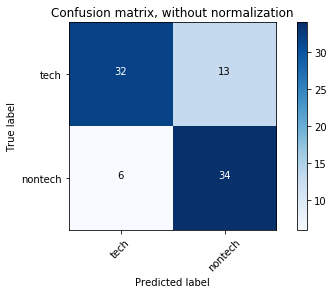

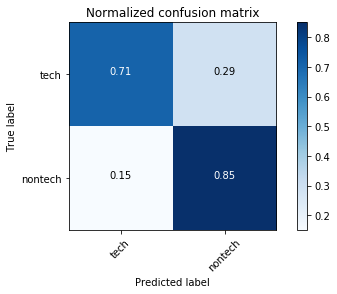

In [95]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(originatedTestRssfeeds['label'], testRssfeeds['label'])

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=rssC.cc.keys(),
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=rssC.cc.keys(), normalize=True,
                      title='Normalized confusion matrix')

plt.show()

<ol start="3">
<li>Diskutieren Sie das Ergebnis</li>
</ol>

<ol start="4">
<li>Wie könnte die Klassifikationsgüte durch Modifikation der _getwords()_-Methode verbessert werden? Implementieren Sie diesen Ansatz und vergleichen Sie das Ergebnis mit dem des ersten Ansatzes.</li>
</ol>


In [ ]:
#dani test code

import pandas as pd 
import numpy as np
import matplotlib 
    
    
def create_fc(labels,data):
    
    combined = pd.concat([labels,data], axis=1)
    
    fc = {}
    
    unique_labels = labels.unique()
    empty_labels_dict =  {ulabel: 0 for ulabel in unique_labels}
                    
    # loop over combined data
    for i,row in combined.iterrows():
        label, words =  row[row.index[0]], row[row.index[1]].lower().split()
        
        for word in words:
            if word not in fc:
                fc[word] = empty_labels_dict.copy()
            if word in fc:
                fc[word][label] += 1
    
    return fc    
    
def create_cc(labels):
    unique_labels = labels.unique()
    return {j: labels.loc[labels==unique_labels[i]].size for i,j in enumerate(unique_labels)}
    

print create_fc(rssfeeds['label'],rssfeeds['text'])

print create_cc(rssfeeds['label'])

In [ ]:
# unbenutzter code
def create_fc(self):
        'erzeugt ein Dict über alle Wörter(Keys) und zeigt wie oft ein Wort in einer Klasse vorkommt'
        combined = pd.concat([self.labels,self.doc_list[1]], axis=1)
        fc = {}
    
        # erzeuge leeres labels dict
        unique_labels = self.labels.unique()
        empty_labels_dict =  {ulabel: 0 for ulabel in unique_labels}

        # loop über kombinierte daten 
        for i,row in combined.iterrows():
            # erzeuge label pro row (wordliste)
            label, words =  row[row.index[0]], row[row.index[1]].lower().split()
            for word in words:
                # falls word nicht in fc, erzeuge es und einen leeres labels dict
                if word not in fc:
                    fc[word] = empty_labels_dict.copy()
                # falls word in fc zähle counter hoch
                if word in fc:
                    fc[word][label] += 1
        return fc
    
    def create_cc(self):
        'erzeugt Dict und zählt ein Label hoch, wenn ein Dokument einem Label zugewiesen wurde'
        unique = self.labels.unique()
        cc = {j: self.labels.loc[self.labels==unique[i]].size for i,j in enumerate(unique)}
        return cc